# Computing spatial heterogeneity scores with SHouT

## Import packages and load example datasets

In [1]:
import squidpy as sq
import seaborn as sns
import shout
import pandas as pd
from IPython.display import set_matplotlib_formats
import matplotlib.pyplot as plt

/Users/surya/anaconda3/envs/spatial_proteomics_cloned_xai/lib/python3.10/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/Users/surya/anaconda3/envs/spatial_proteomics_cloned_xai/lib/python3.10/site-packages/spatialdata/__init__.py:9: UserWarning: Geopandas was set to use PyGEOS, changing to shapely 2.0 with:

	geopandas.options.use_pygeos = True

If you intended to use PyGEOS, set the option to False.
  _check_geopandas_using_shapely()


In [2]:
mibitof = sq.datasets.mibitof()
seqfish = sq.datasets.seqfish()

## Compute and visualize scores for MIBI-TOF data

In [4]:
%%time
shout.all_scores(mibitof, cluster_key='Cluster', radius=2)

CPU times: user 9.92 s, sys: 89.5 ms, total: 10 s
Wall time: 10 s


/Users/dbblumenthal/opt/anaconda3/envs/shout/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/dbblumenthal/opt/anaconda3/envs/shout/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


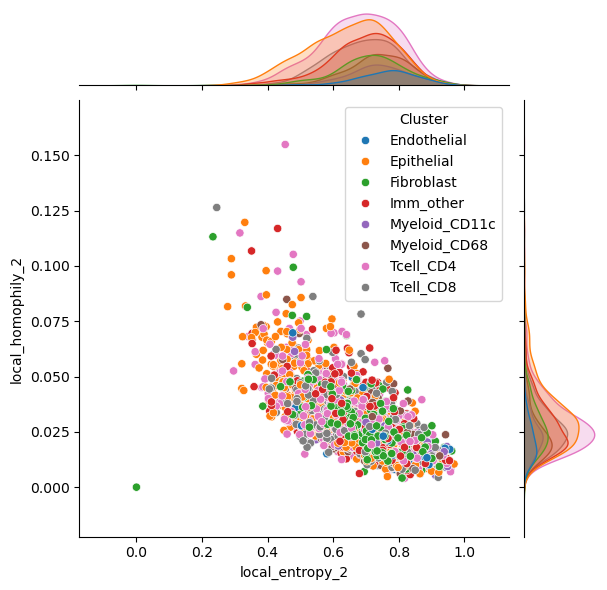

In [6]:
sns.jointplot(data=mibitof.obs, x='local_entropy_2', y='local_homophily_2', hue='Cluster')

- These results show that helper T cells (Th) and epithelial cells (Ep) are the most abundant in the MIBI TOF dataset.

- Additionally, it also shows that endothelial cells have the highest local entropy score and local homophily score, whereas Th and Ep cells are most abundant at a lower score for both local entropy as well as local homophily. Moreover, for all cell types, the distribution matches for local homophily and local entropy scores, therefore suggesting that cell types that are likely to contain the most information are also the most diversely connected.

/Users/dbblumenthal/opt/anaconda3/envs/shout/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/dbblumenthal/opt/anaconda3/envs/shout/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


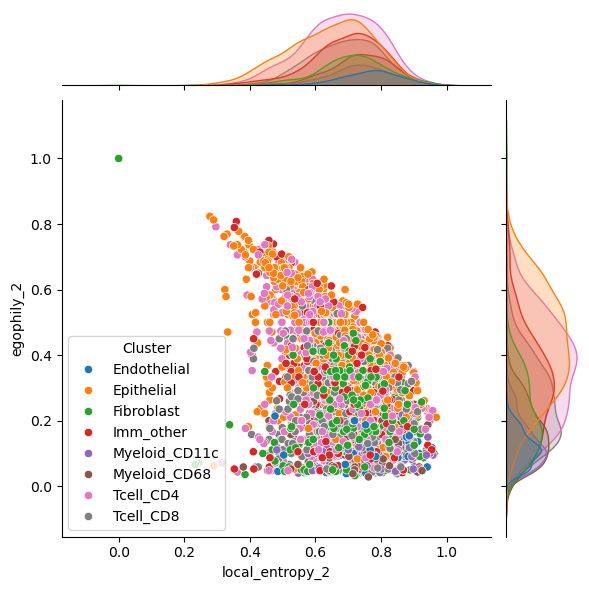

In [ ]:
sns.jointplot(data=mibitof.obs, x='local_entropy_2', y='egophily_2', hue='Cluster')

/Users/dbblumenthal/opt/anaconda3/envs/shout/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/dbblumenthal/opt/anaconda3/envs/shout/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


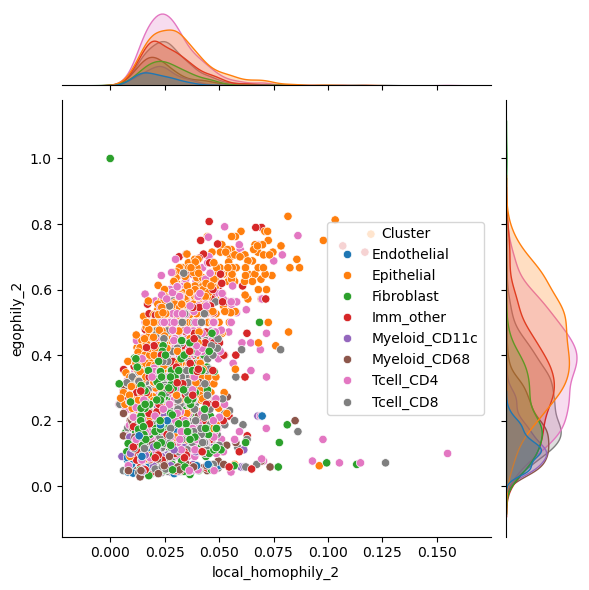

In [ ]:
sns.jointplot(data=mibitof.obs, x='local_homophily_2', y='egophily_2', hue='Cluster')

- The results suggest that all cell types except endothelial cells (End) and myeloid dendritic cells (Md), i.e., Ep, fibroblasts (Fib), immune cells (Imm), CD68+ macrophages (Mac), Th and cytotoxic T cells (Tc), have a pretty uniform distribution of egophily--meaning they appear both in the presence of other cell types, as well as in clusters of similar celltypes. This can be explained by the articulate but well spread-out patterns of Ep, Th and Fib cells.

## Compute and visualize scores for seqFISH data

In [3]:
%%time
scores_seqfish = shout.all_scores(seqfish, cluster_key='celltype_mapped_refined', radius=2)

CPU times: user 3min 3s, sys: 2.33 s, total: 3min 5s
Wall time: 3min 5s


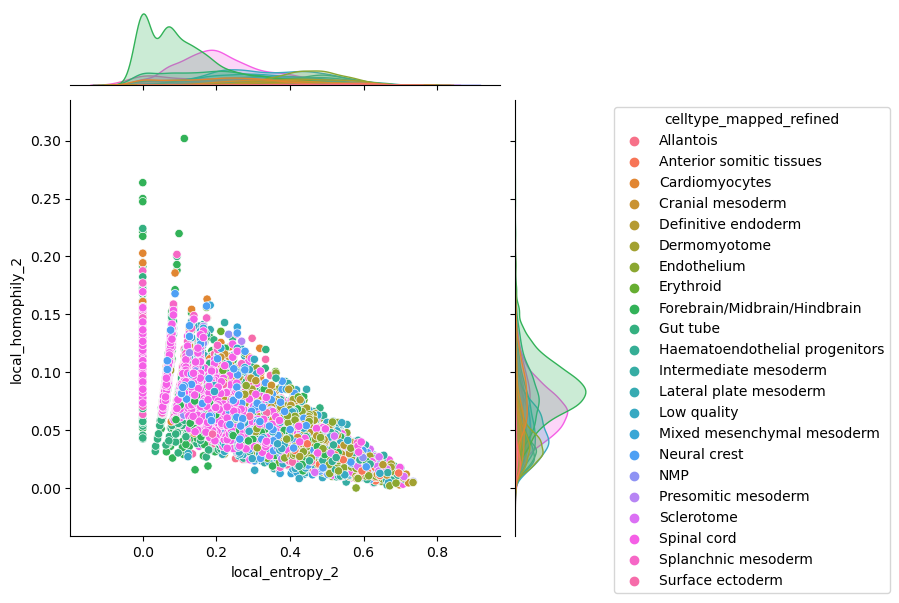

In [4]:
f = sns.jointplot(data=seqfish.obs, x='local_entropy_2', y='local_homophily_2', hue='celltype_mapped_refined')
sns.move_legend(f.figure.axes[0], "upper left", bbox_to_anchor=(1.25, 1))

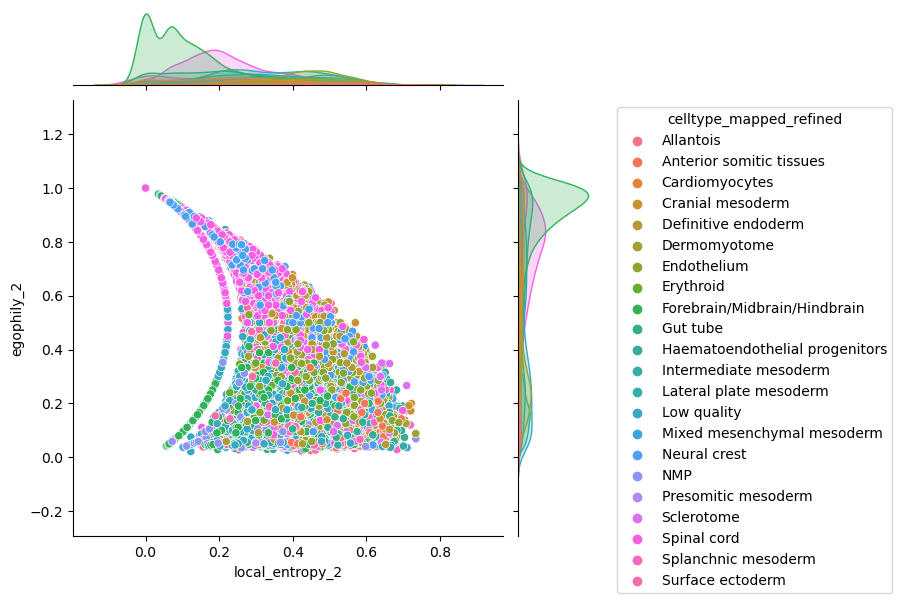

In [5]:
f = sns.jointplot(data=seqfish.obs, x='local_entropy_2', y='egophily_2', hue='celltype_mapped_refined')
sns.move_legend(f.figure.axes[0], "upper left", bbox_to_anchor=(1.25, 1))

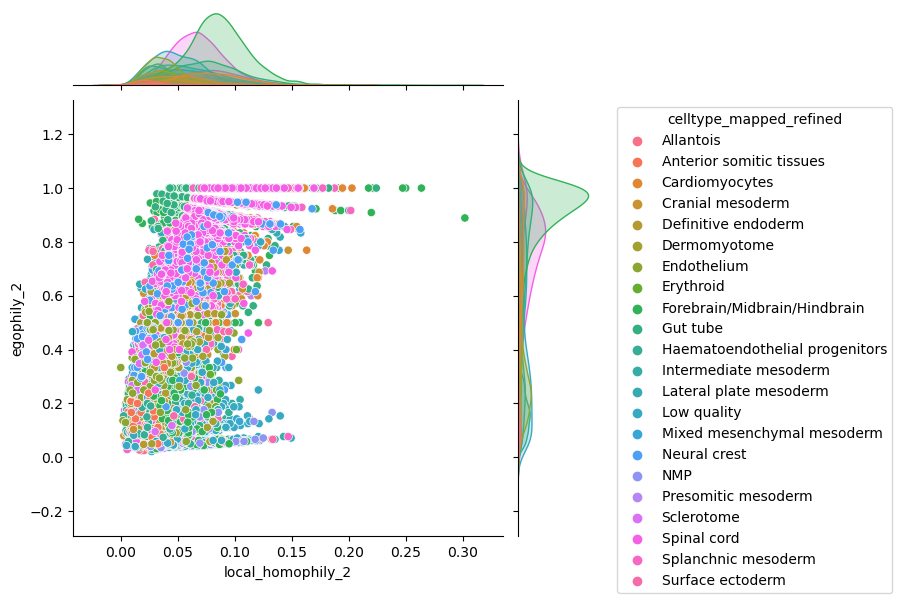

In [6]:
f = sns.jointplot(data=seqfish.obs, x='local_homophily_2', y='egophily_2', hue='celltype_mapped_refined')
sns.move_legend(f.figure.axes[0], "upper left", bbox_to_anchor=(1.25, 1))

# Scalability

### A. MIBITOF data:

In [ ]:
# --- Imports: ---
import time
# ---- Code: ----
runtimes={}
n=[1, 5, 10, 20, 40, 80, 100]

for _count_ in range (50):
    count=0
    for i in n:
        print('Iteration '+str(_count_+1)+', i= '+str(i))
        # ---
        start = time.time()
        scores_mibitof = shout.all_scores(mibitof, cluster_key='Cluster', radius=2)
        end = time.time()
        try:
            runtimes[i].append(end-start)
        except:
            runtimes[i]=[]
            runtimes[i].append(end-start)

Iteration 1, i= 1
Iteration 1, i= 5
Iteration 1, i= 10
Iteration 1, i= 20
Iteration 1, i= 40
Iteration 1, i= 80
Iteration 1, i= 100
Iteration 2, i= 1
Iteration 2, i= 5
Iteration 2, i= 10
Iteration 2, i= 20
Iteration 2, i= 40
Iteration 2, i= 80
Iteration 2, i= 100
Iteration 3, i= 1
Iteration 3, i= 5
Iteration 3, i= 10
Iteration 3, i= 20
Iteration 3, i= 40
Iteration 3, i= 80
Iteration 3, i= 100
Iteration 4, i= 1
Iteration 4, i= 5
Iteration 4, i= 10
Iteration 4, i= 20
Iteration 4, i= 40
Iteration 4, i= 80
Iteration 4, i= 100
Iteration 5, i= 1
Iteration 5, i= 5
Iteration 5, i= 10
Iteration 5, i= 20
Iteration 5, i= 40
Iteration 5, i= 80
Iteration 5, i= 100
Iteration 6, i= 1
Iteration 6, i= 5
Iteration 6, i= 10
Iteration 6, i= 20
Iteration 6, i= 40
Iteration 6, i= 80
Iteration 6, i= 100
Iteration 7, i= 1
Iteration 7, i= 5
Iteration 7, i= 10
Iteration 7, i= 20
Iteration 7, i= 40
Iteration 7, i= 80
Iteration 7, i= 100
Iteration 8, i= 1
Iteration 8, i= 5
Iteration 8, i= 10
Iteration 8, i= 20
It

In [27]:
runtimes_df=pd.DataFrame.from_dict(runtimes)
print(list(runtime_df.columns))
print(runtime_df.head())

[1, 5, 10, 20, 40, 80, 100]
        1          5          10         20         40         80         100
0  9.829403  10.508636  10.500782  10.429436  11.313416  11.616972  11.271674
1  9.138457   9.492545   9.291450   8.986964   9.149297   9.112489   9.013567
2  8.989046   9.050477   8.935788   8.975302   9.061326   8.973713   8.912144
3  9.124988  10.006779   9.554159   9.819364   9.768444   9.964116  10.049358
4  9.801530  10.118847  10.119798   9.821927  10.060840   9.947197   9.924900


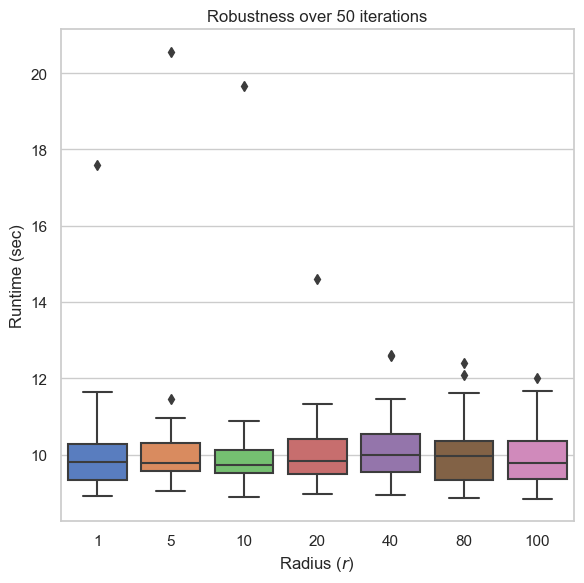

In [28]:
sns.set_theme(style="whitegrid", palette="muted")
fig, axes = plt.subplots(figsize=(6, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)
df_melted=pd.melt(runtimes_df)
ax=sns.boxplot(x = 'variable', y = 'value', data = df_melted, ax=axes, orient='v')
title=f'Robustness over 50 iterations'
xlabel="Radius ($r$)"
ylabel="Runtime (sec)"
axes.set_title(title)
axes.set_xlabel(xlabel)
axes.set_ylabel(ylabel)
fig.tight_layout()
plt.savefig(f'Boxplot_Robustness_MIBITOF.pdf', format='pdf', bbox_inches='tight')
plt.show()
plt.close()

In [4]:
runtimes_mibitof=runtimes.copy()
runtimes_df_mibitof=runtimes_df.copy()
df_melted_mibitof=df_melted.copy()

In [8]:
import pickle
# ---
with open('tutorial_notebook_mibitof_data.pkl', 'wb') as f:
    pickle.dump([mibitof, runtimes_mibitof, runtimes_df_mibitof, df_melted_mibitof], f)

In [100]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
import seaborn as sns
sns.set_theme(style="whitegrid", palette="muted")
from PIL import Image
import matplotlib.image as mpimg

In [184]:
import matlab
import matlab.engine
myEngine = matlab.engine.start_matlab()

### B. SeqFish data:

In [8]:
# --- Imports: ---
import time
# ---- Code: ----
runtimes={}
# n=[1, 5, 10, 20, 40, 80, 100]
n=[5, 25, 50, 75, 100]

for _count_ in range (25):
    count=0
    for i in n:
        print('Iteration '+str(_count_+1)+', i= '+str(i))
        # ---
        start = time.time()
        scores_seqfish = shout.all_scores(seqfish, cluster_key='celltype_mapped_refined', radius=2)
        end = time.time()
        try:
            runtimes[i].append(end-start)
        except:
            runtimes[i]=[]
            runtimes[i].append(end-start)
        

Iteration 1, i= 5
Iteration 1, i= 25
Iteration 1, i= 50
Iteration 1, i= 75
Iteration 1, i= 100
Iteration 2, i= 5
Iteration 2, i= 25
Iteration 2, i= 50
Iteration 2, i= 75
Iteration 2, i= 100
Iteration 3, i= 5
Iteration 3, i= 25
Iteration 3, i= 50
Iteration 3, i= 75
Iteration 3, i= 100
Iteration 4, i= 5
Iteration 4, i= 25
Iteration 4, i= 50
Iteration 4, i= 75
Iteration 4, i= 100
Iteration 5, i= 5
Iteration 5, i= 25
Iteration 5, i= 50
Iteration 5, i= 75
Iteration 5, i= 100
Iteration 6, i= 5
Iteration 6, i= 25
Iteration 6, i= 50
Iteration 6, i= 75
Iteration 6, i= 100
Iteration 7, i= 5
Iteration 7, i= 25
Iteration 7, i= 50
Iteration 7, i= 75
Iteration 7, i= 100
Iteration 8, i= 5
Iteration 8, i= 25
Iteration 8, i= 50
Iteration 8, i= 75
Iteration 8, i= 100
Iteration 9, i= 5
Iteration 9, i= 25
Iteration 9, i= 50
Iteration 9, i= 75
Iteration 9, i= 100
Iteration 10, i= 5
Iteration 10, i= 25
Iteration 10, i= 50
Iteration 10, i= 75
Iteration 10, i= 100
Iteration 11, i= 5
Iteration 11, i= 25
Iterat

In [10]:
runtimes_df=pd.DataFrame.from_dict(runtimes)
print(list(runtimes_df.columns))
print(runtimes_df.head())

[5, 25, 50, 75, 100]
          5           25          50          75          100
0  196.288708  238.589425  240.991108  267.171237  261.999793
1  241.704831  236.393125  226.757260  219.163158  217.893733
2  219.653676  217.303972  217.364522  218.352241  216.382354
3  218.079308  217.017829  216.962986  217.144858  213.103838
4  215.335298  217.338528  214.409066  216.443696  218.738610


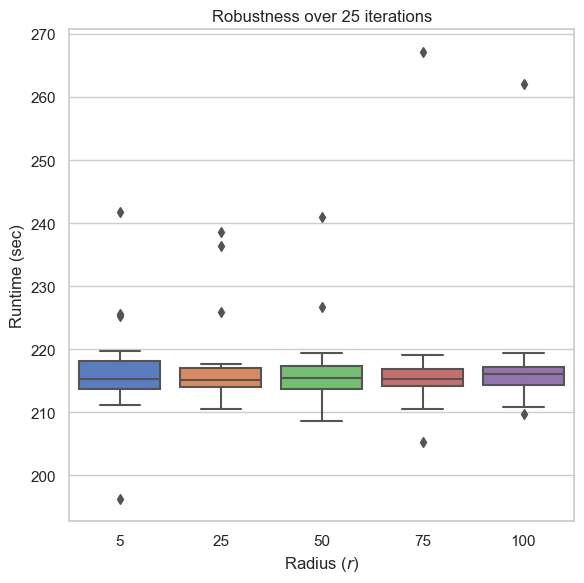

In [11]:
sns.set_theme(style="whitegrid", palette="muted")
fig, axes = plt.subplots(figsize=(6, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)
df_melted=pd.melt(runtimes_df)
ax=sns.boxplot(x = 'variable', y = 'value', data = df_melted, ax=axes, orient='v')
title=f'Robustness over 25 iterations'
xlabel="Radius ($r$)"
ylabel="Runtime (sec)"
axes.set_title(title)
axes.set_xlabel(xlabel)
axes.set_ylabel(ylabel)
fig.tight_layout()
plt.savefig(f'Boxplot_Robustness_MIBITOF.pdf', format='pdf', bbox_inches='tight')
plt.show()
plt.close()

In [12]:
runtimes_seqfish=runtimes.copy()
runtimes_df_seqfish=runtimes_df.copy()
df_melted_seqfish=df_melted.copy()

In [16]:
import pickle
with open('tutorial_notebook_seqfish_data.pkl', 'wb') as f:
    pickle.dump([seqfish, runtimes_seqfish, runtimes_df_seqfish, df_melted_seqfish], f)

# Visualization:

### I. Important functions:

In [17]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.144])
    # # r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    # # gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    # # return gray

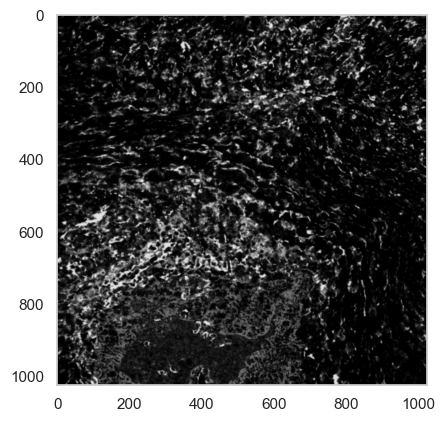

In [193]:
gray_img = rgb2gray(mibitof.uns['spatial']['point16']['images']['hires'])
# plt.imshow(img_gray, cmap=plt.get_cmap('gray'))
# plt.show()

plt.imshow(gray_img, cmap=plt.cm.gray)
# plt.imshow()

(1024, 1024, 3)
[[[ 3  3  0]
  [ 2  2  0]
  [ 1  1  0]
  ...
  [ 6 15  9]
  [ 2  7  5]
  [ 1  3  2]]

 [[ 5  5  0]
  [ 4  4  0]
  [ 2  2  0]
  ...
  [ 6 14  7]
  [ 2  6  3]
  [ 1  2  1]]

 [[ 5  5  0]
  [ 4  4  0]
  [ 2  2  0]
  ...
  [ 8 15  7]
  [ 3  6  2]
  [ 2  3  0]]

 ...

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]]


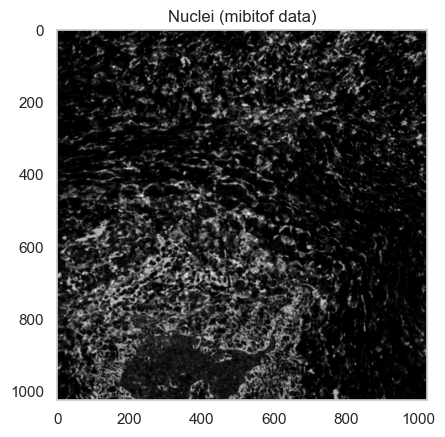

In [194]:
fig, axes=plt.subplots()
print(np.shape(mibitof.uns['spatial']['point16']['images']['hires']))
# arr = np.asarray(mibitof.uns['spatial']['point16']['images']['hires'])/2
arr = np.array(mibitof.uns['spatial']['point16']['images']['hires'])
print(arr)
# arr=matlab.double(arr)
# img=myEngine.rgb2gray(arr)
arr=np.mean(arr, axis=2)
# plt.imshow(mibitof.uns['spatial']['point16']['images']['hires'][:,:,0], cmap=plt.get_cmap('gray'))
# plt.imshow(np.asarray(mibitof.uns['spatial']['point16']['images']['hires'])[:,:,0], cmap=plt.get_cmap('gray'))
plt.imshow(arr, cmap=plt.get_cmap('gray')) #cmap='gray', vmin=0, vmax=255
# plt.imshow(img, cmap=plt.get_cmap('gray'))
_str_='Nuclei (mibitof data)'
# x=[]
# y=[]
# cell_coords=[]
# for key, value in pickle_[i].uns['cell_coordinates'].items():
    # x
    # axes.scatter(np.mean(value[1]),np.mean(value[0]),label=key, s=2)
# axes.scatter(mibitof.obsm['spatial'][0],mibitof.obsm['spatial'][1],s=2)
plt.title(_str_)
plt.show()
plt.close()

In [195]:
DF_seqfish=mibitof.obs.copy()
DF_seqfish['cell_index']=list(DF_seqfish.index)
for i in list(mibitof.obsm.keys()):
    _str_='obsm_'+i
    DF_seqfish[_str_]=list(mibitof.obsm[i])
    if i=='spatial':
        df_=pd.DataFrame(mibitof.obsm['spatial'])
        DF_seqfish['x']=list(df_[0])
        DF_seqfish['y']=list(df_[1])
for i in list(mibitof.obsp.keys()):
    _str_='obsp_'+i
    DF_seqfish[_str_]=list(mibitof.obsp[i])

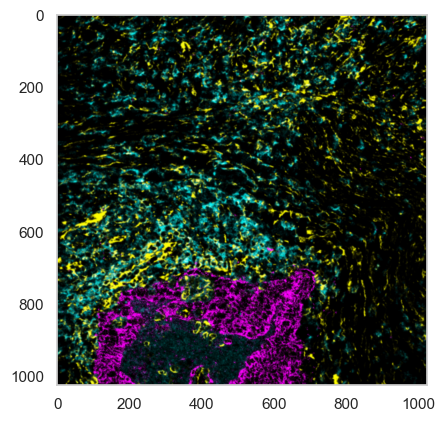

In [196]:
tissue_image=np.array(mibitof.uns['spatial']['point16']['images']['hires'])
plt.imshow(tissue_image)

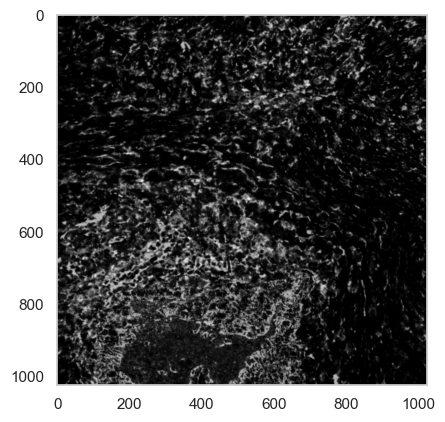

In [197]:
tissue_image_gray=np.mean(tissue_image, axis=2)
plt.imshow(tissue_image_gray, cmap='gray')

/var/folders/5h/3mdpj4v91flbh9l55myx51bm0000gn/T/ipykernel_93828/3744200506.py:56: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


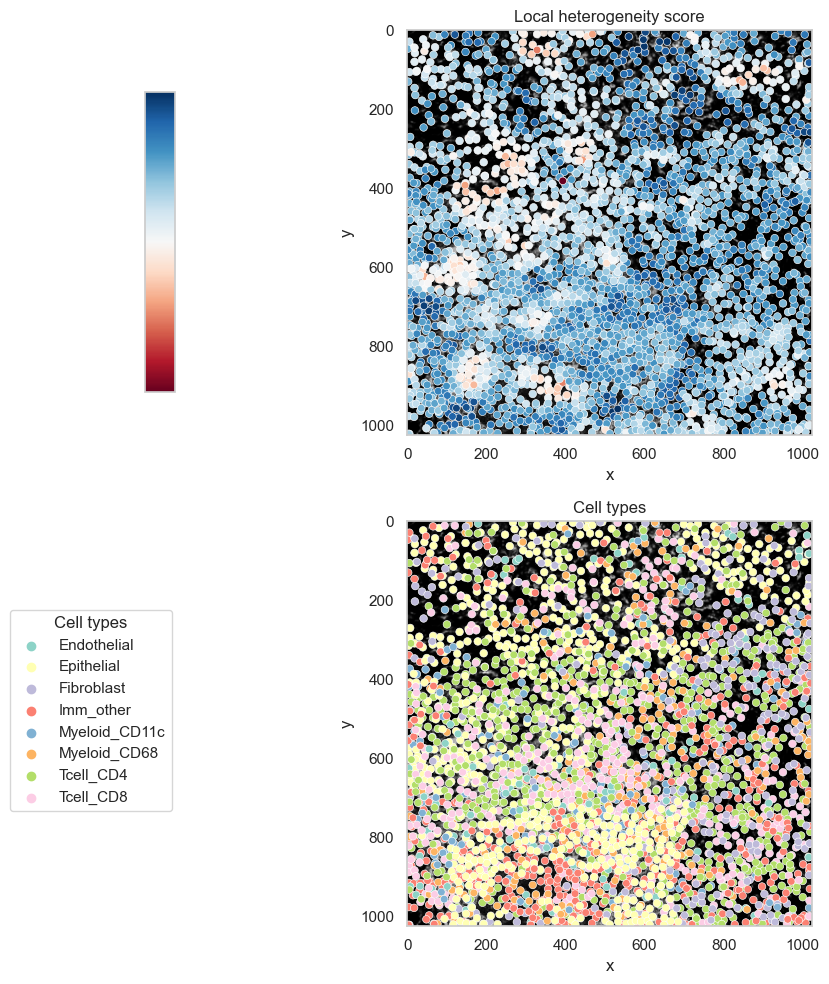

In [198]:
local_heterogeneity_measure='local_entropy_2'
# =====
from IPython.display import set_matplotlib_formats
import seaborn as sns
sns.set_theme(style="whitegrid", palette="muted")
# ---
sns.set_style("whitegrid", {'axes.grid' : False})
# fig, (axes1, axes2) = plt.subplots(1,2)
layout = [["A"], ["B"]]
fig, axes = plt.subplot_mosaic(layout, figsize=(10,10))
# # plt.suptitle(f"\nPatient#{i} (condition: {_label_})", x=0.40, y=1.00)
axes["A"].imshow(tissue_image_gray, cmap='gray')
# ---
xlabel='x'
ylabel='y'
ax = sns.scatterplot(ax=axes["A"], data=DF_seqfish, x="x", y="y", hue=local_heterogeneity_measure, palette='RdBu', s=30)
ax.set(xlabel=xlabel, ylabel=ylabel, title=f'Local heterogeneity score')
# ax.invert_yaxis()
axes["A"].tick_params(left=False, bottom=False)
# ---
# norm = plt.Normalize(df_coords['local_heterogeneity_score'].min(), df_coords['local_heterogeneity_score'].max())
norm = plt.Normalize(0, 1)
sm = plt.cm.ScalarMappable(cmap="RdBu", norm=norm)
sm.set_array([])
# Remove the legend and add a colorbar
ax.get_legend().remove()
# ax.figure.colorbar(sm, location = 'right')
cax_=fig.add_axes([0.1, 0.6, 0.03, 0.3])
ax.figure.colorbar(sm, cax=cax_)
# ========== X ==========
# ---
sns.set_style("whitegrid", {'axes.grid' : False})
# fig, axes = plt.subplots()
axes["B"].imshow(tissue_image_gray, cmap='gray')
# ---
xlabel='x'
ylabel='y'
ax = sns.scatterplot(ax=axes["B"], data=DF_seqfish, x="x", y="y", hue="Cluster", palette='Set3', s=30)
ax.set(xlabel=xlabel, ylabel=ylabel, title=f'Cell types')
# ax.invert_yaxis()
axes["B"].tick_params(left=False, bottom=False)
# ---
sns.move_legend(axes["B"], "upper left", bbox_to_anchor=(-1.0, .8), title='Cell types')
        # ---
        # # ---
        # # norm = plt.Normalize(df_coords['local_heterogeneity_score'].min(), df_coords['local_heterogeneity_score'].max())
        # norm = plt.Normalize(0, 1)
        # sm = plt.cm.ScalarMappable(cmap="RdBu", norm=norm)
        # sm.set_array([])
        # # Remove the legend and add a colorbar
        # ax.get_legend().remove()
        # ax.figure.colorbar(sm)
        # # ---
plt.xticks([])
plt.yticks([])
fig.tight_layout()
# # plt.savefig(f'{_label_}\Patient#{i} (condition: {_label_}).pdf', format='pdf', bbox_inches='tight')
plt.show()
plt.close()
# =====

## A. Seqfish data: